Расчет размера выборки
----

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['power']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Чистим данные от выбросов

In [123]:
lvl5 = pd.read_csv('StatsFor5lvl.csv')
drop_col = []
for col in lvl5.columns:
    pct_missing = np.mean(lvl5[col].isnull())
    if pct_missing == 1:
        drop_col.append(col)
    print('{} - {}%'.format(col, round(pct_missing*100)))

playerid - 0%
platform - 0%
PurchaseCount - 0%
MatchCount - 0%
LevelCount - 0%
SessionsCount - 0%
SoftCurrencySpent - 0%
HardCurrencySpent - 0%
RealWorldCurrencySpent - 0%
SessionTime - 0%


In [110]:
for col in lvl5.columns:
    if lvl5[col].dtype == 'int64' or lvl5[col].dtype == 'float64':
        print(lvl5[col].describe())

count    3118.000000
mean        0.082745
std         0.478827
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: PurchaseCount, dtype: float64
count    3118.000000
mean       15.106479
std        19.922135
min         0.000000
25%         3.000000
50%         8.000000
75%        19.000000
max       232.000000
Name: MatchCount, dtype: float64
count    3118.000000
mean        3.171264
std         3.630183
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        30.000000
Name: LevelCount, dtype: float64
count    3118.000000
mean       14.966966
std        21.810715
min         1.000000
25%         3.000000
50%         7.000000
75%        18.000000
max       336.000000
Name: SessionsCount, dtype: float64
count      3118.000000
mean      76639.015394
std      107506.505695
min           0.000000
25%           0.000000
50%       37900.000000
75%       99350.000000
max      870400.000000
Name: 

In [109]:
lvl5 = lvl5[lvl5['SessionTime'] >= 0]
lvl5 = lvl5[lvl5['RealWorldCurrencySpent'] >= 0]

for col in ['MatchCount', 'LevelCount', 'HardCurrencySpent']:
    lvl5 = lvl5[lvl5[col] < max(lvl5[col])]

(array([6.30e+01, 1.70e+03, 6.22e+02, 3.02e+02, 1.75e+02, 9.30e+01,
        6.60e+01, 5.70e+01, 3.30e+01, 1.90e+01, 1.70e+01, 1.20e+01,
        3.00e+00, 7.00e+00, 4.00e+00, 1.00e+00, 4.00e+00, 2.00e+00,
        2.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00]),
 array([-3.76600000e+03, -4.12333333e+01,  3.68353333e+03,  7.40830000e+03,
         1.11330667e+04,  1.48578333e+04,  1.85826000e+04,  2.23073667e+04,
         2.60321333e+04,  2.97569000e+04,  3.34816667e+04,  3.72064333e+04,
         4.09312000e+04,  4.46559667e+04,  4.83807333e+04,  5.21055000e+04,
         5.58302667e+04,  5.95550333e+04,  6.32798000e+04,  6.70045667e+04,
         7.07293333e+04,  7.44541000e+04,  7.81788667e+04,  8.19036333e+04,
         8.56284000e+04,  8.93531667e+04,  9.30779333e+04,  9.68027000e+04,
         1.00527467e+05,  1.04252233e+05,  1.07977000e+05]),
 <a list of 30 Patch objects>)

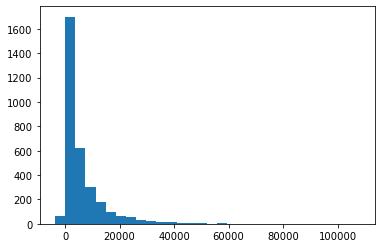

In [128]:
plt.hist(lvl5['SessionTime'], bins = 30)

In [89]:
lvl10 = pd.read_csv('StatsFor10lvl.csv')
drop_col = []
for col in lvl10.columns:
    pct_missing = np.mean(lvl10[col].isnull())
    if pct_missing == 1:
        drop_col.append(col)
    print('{} - {}%'.format(col, round(pct_missing*100)))

playerid - 0%
platform - 0%
PurchaseCount - 0%
MatchCount - 0%
LevelCount - 0%
SessionsCount - 0%
SoftCurrencySpent - 0%
HardCurrencySpent - 0%
RealWorldCurrencySpent - 0%
SessionTime - 0%


In [116]:
for col in lvl10.columns:
    if lvl10[col].dtype == 'int64' or lvl10[col].dtype == 'float64':
        print(lvl10[col].describe())

count    1412.000000
mean        0.121813
std         0.591127
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: PurchaseCount, dtype: float64
count    1412.000000
mean       18.655807
std        22.568907
min         0.000000
25%         4.000000
50%        12.000000
75%        25.000000
max       213.000000
Name: MatchCount, dtype: float64
count    1412.000000
mean        3.837819
std         3.394858
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        26.000000
Name: LevelCount, dtype: float64
count    1412.000000
mean       20.349150
std        24.498295
min         1.000000
25%         4.000000
50%        11.000000
75%        26.000000
max       222.000000
Name: SessionsCount, dtype: float64
count      1412.000000
mean     116758.073654
std      126727.602055
min           0.000000
25%       11675.000000
50%       86800.000000
75%      178125.000000
max      889100.000000
Name: 

(array([385.,   1.,   1.,   1.,   0.,   0.,   1.,   2.,   2.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([    0.,   292.,   584.,   876.,  1168.,  1460.,  1752.,  2044.,
         2336.,  2628.,  2920.,  3212.,  3504.,  3796.,  4088.,  4380.,
         4672.,  4964.,  5256.,  5548.,  5840.,  6132.,  6424.,  6716.,
         7008.,  7300.,  7592.,  7884.,  8176.,  8468.,  8760.,  9052.,
         9344.,  9636.,  9928., 10220., 10512., 10804., 11096., 11388.,
        11680., 11972., 12264., 12556., 12848., 13140., 13432., 13724.,
        14016., 14308., 14600.]),
 <a list of 50 Patch objects>)

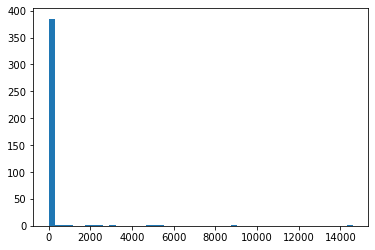

In [122]:
lvl10 = lvl10[lvl10['RealWorldCurrencySpent'] >= 0]
lvl10 = lvl10[lvl10['SessionTime'] >= 0]
# for col in ['HardCurrencySpent']:
#     lvl10 = lvl10[lvl10[col] < max(lvl10[col])]
plt.hist(lvl10[lvl10['platform'] == 'IPhonePlayer']['HardCurrencySpent'], bins = 50)


baseline_rate = conversions_control / total_users_control
practical_significance = 0.01 #user defined
confidence_level = 0.05 #user defined, for a 95% confidence interval
sensitivity = 0.8 #user defined

effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + practical_significance)
sample_size = sms.NormalIndPower().solve_power(effect_size = effect_size, power = sensitivity, 
                                               alpha = confidence_level, ratio=1)
print("Required sample size: ", round(sample_size), " per group")


In [91]:
from statsmodels.stats.power import tt_ind_solve_power

mean_diff, sd_diff = lvl5['RealWorldCurrencySpent'].mean() , lvl5['RealWorldCurrencySpent'].std()

def calutate_sample_size(df, min, max, step):
    """ Функция подсчета размера группы теста по Ткритерию 
    df - DataFrame
    min - минимальное % изменение
    max - максимальное процентное изменение
    step - шаг процентного изменения """
    upload = pd.DataFrame(data = {'% diff': [round(x*100, 2) for x in np.arange(min, max, step)]})
    for col in df.columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            col_arr = []
            for x in np.arange(min, max, step):
                std_effect_size = (df[col].mean() * (1+x) - df[col].mean())  / df[col].std()
                n = tt_ind_solve_power(effect_size=std_effect_size, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')
                col_arr.append(n)

            upload[col] = col_arr
    return upload

In [112]:
upload = calutate_sample_size(lvl5[lvl5['platform'] == 'Android'], 0.01, 0.26, 0.01)
upload.to_csv('upload_lvl5_andriod.csv', encoding = 'utf-8')

upload = calutate_sample_size(lvl5[lvl5['platform'] == 'IPhonePlayer'], 0.01, 0.26, 0.01)
upload.to_csv('upload_lvl5_iphone.csv', encoding = 'utf-8')

In [118]:
upload = calutate_sample_size(lvl10[lvl10['platform'] == 'Android'], 0.01, 0.26, 0.01)
upload.to_csv('upload_lvl10_andriod.csv', encoding = 'utf-8')

upload = calutate_sample_size(lvl10[lvl10['platform'] == 'IPhonePlayer'], 0.01, 0.26, 0.01)
upload.to_csv('upload_lvl10_iphone.csv', encoding = 'utf-8')

Нормальность распредедления
----

In [84]:
import scipy.stats as stats
# H0 данные распределены нормально
for col in lvl10.drop(columns = ['playerid']).columns: 
    if lvl10[col].dtype == 'int64' or lvl10[col].dtype == 'float64':
        print (col, stats.shapiro(lvl10[col]))

PurchaseCount ShapiroResult(statistic=0.19356077909469604, pvalue=0.0)
MatchCount ShapiroResult(statistic=0.7496380805969238, pvalue=4.93957708674498e-42)
LevelCount ShapiroResult(statistic=0.7948320508003235, pvalue=3.932976755672677e-39)
SessionsCount ShapiroResult(statistic=0.7467566728591919, pvalue=3.339294240486039e-42)
SoftCurrencySpent ShapiroResult(statistic=0.8305090665817261, pvalue=1.8920906733995685e-36)
HardCurrencySpent ShapiroResult(statistic=0.0793105959892273, pvalue=0.0)
RealWorldCurrencySpent ShapiroResult(statistic=0.09806352853775024, pvalue=0.0)
SessionTime ShapiroResult(statistic=0.24311572313308716, pvalue=0.0)


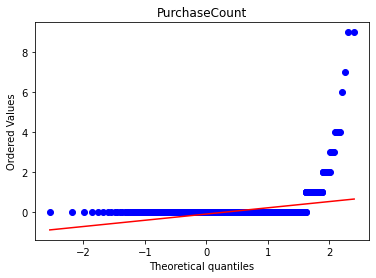

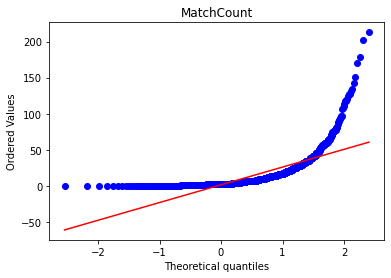

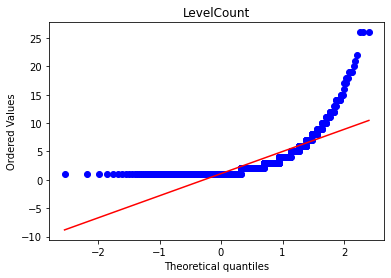

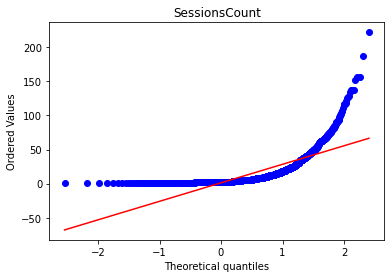

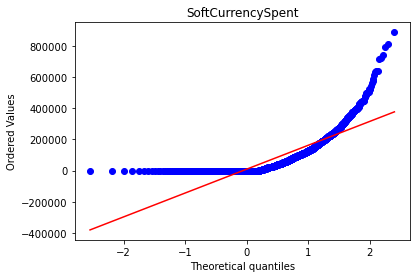

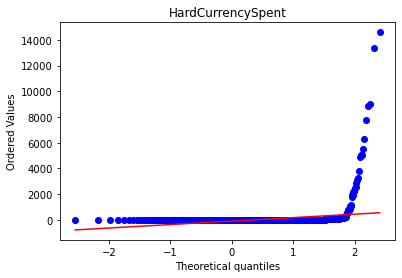

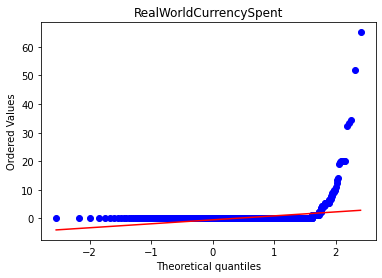

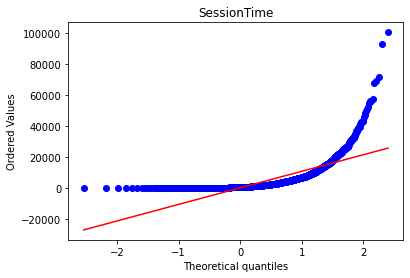

In [136]:
for i, col in enumerate(lvl10.drop(columns = ['playerid']).columns): 
    if lvl10[col].dtype == 'int64' or lvl10[col].dtype == 'float64':
        fig = plt.figure()
        ax = fig.add_subplot(111)
        x = stats.loggamma.rvs(c=2.5, size=500)
        res = stats.probplot(lvl10[col], dist=stats.loggamma, sparams=(2.5,), plot=ax)
        ax.set_title("{}".format(col))
pylab.show()

Размер выборки для конверсии
---
https://medium.com/@henryfeng/handy-functions-for-a-b-testing-in-python-f6fdff892a90 - статья из которой взят код

https://www.evanmiller.org/ab-testing/chi-squared.html - калькулятор, с которым можно сравнить

In [59]:
from scipy import stats

def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    qu = stats.norm.ppf(1 - alpha/2)
    diff = abs(p2-p1)
    bp = (p1+p2) / 2
    
    v1 = p1 * (1-p1)
    v2 = p2 * (1-p2)
    bv = bp * (1-bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    
    power = power_part_one + power_part_two
    
    return (power)

In [60]:
def get_sample_size(power, p1, p2, cl, max_n=10000000):
    n = 1 
    while n <= max_n:
        tmp_power = get_power(n, p1, p2, cl)
        if tmp_power >= power: 
            return n 
        else: 
            n = n + 100
    return "Increase Max N Value"

In [61]:
def calculate_conversion(dict, power, cl, min, max, step):
    upload = pd.DataFrame(data = {'% diff': [round(x*100, 2) for x in np.arange(min, max, step)]})
    for key, item in dict.items():
        key_arr = []
        conversion_rate = item
        for x in np.arange(min, max, step):
            percent_lift = x
            conversion_rate_p2 = conversion_rate * (1 + percent_lift)
            n = get_sample_size(power, conversion_rate, conversion_rate_p2, cl)
            key_arr.append(n)
        upload[key] = key_arr
    return upload

In [62]:
power = 0.8
cl = 0.95

conversion_andriod = {'D1' : 0.216,
             'D3' : 0.0837,
             'D7' : 0.038,
             'Converion': 0.0295}

conversion_iphone = {'D1' : 0.293,
                     'D3' : 0.127,
                     'D7' : 0.0667,
                     'Converion': 0.0618}

upload = calculate_conversion(conversion_andriod, power, cl, 0.01, 0.26, 0.01)
upload.to_csv('upload_andriod.csv', encoding = 'utf-8')


In [64]:
upload = calculate_conversion(conversion_iphone, power, cl, 0.01, 0.26, 0.01)
upload.to_csv('upload_iphone.csv', encoding = 'utf-8')

In [67]:
def get_pvalue(con_conv, test_conv, con_size, test_size):
    lift = -abs(test_conv - con_conv)
    
    scale_one = con_conv * (1-con_conv) * (1/ con_size)
    scale_two = test_conv * (1-test_conv) * (1/ test_size)
    scale_val = (scale_one + scale_two) ** 0.5
    
    p_value = 2 * stats.norm.cdf(lift, loc=0, scale = scale_val)  
    return p_value

In [83]:
# Trial 1
con_conv = 0.216
test_conv = 0.223
con_size = 59010

test_size = 5901

get_pvalue(con_conv, test_conv, con_size, test_size)  

0.21759022341658107